# Fragmentation in a 1D bar with cohesive elements

The purpose of this tutorial is to fragment a 1D bar (made of 2D triangle elements) and to study the
influence of several parameters controling the fragmentation process

Important parameters are:

- material properties (Youngs modulus, poisson ratio, density)
- Geometry (size of the bar, size of elements)
- Strain rate (Initial velocity profile and maintained pulling velocity)
- Randomization of critical stress
- Contact (computes collision forces between formed fragments)

Time variation graphs of energy, stress and number of fragments will be shown.

The final distribution of fragments will also be shown

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import main
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bar_length = 50 * 10**-3 # (m)

params = {
    'young_modulus':  275.0 * 10**9,  # (Pa)
    'density':  2750.0,  # (kg/m3)
    'fracture_energy':  100.0,  # (N/m)
    'stress_limit':  300.0 * 10**6,  # (Pa)
    'bar_length':  bar_length,
    'number_elements':  1000 * 2,  # Total number of triangular elements
    'area':  1.0,  # Cross sectional area (m2) (Equal to element size )
    'strain_rate':  10.0**4,  # (s-1)
    'time_simulation':  5 * 10**-7,  # Total time of simulation (s)
    'dump_freq': 1,
    'paraview': False,
    'variation_sigma_c': 1e6, # random(uniform) variation of sigma_c 
    'contact': 0
}


In [3]:
model, mesh = main.generate_model.create_model(**params)
results, energies = main.runSimulation(model, **params)

Info    : Mesh generated
Integrating timesteps


  0%|          | 0/1707 [00:00<?, ?it/s]

Computed 2.928932188132839e-10 * 1707 = 5e-07 seconds


In [4]:
# final number of fragments
n = results['n_fragments'].iloc[-1]
print(f'Created {n} fragments')

Created 113 fragments


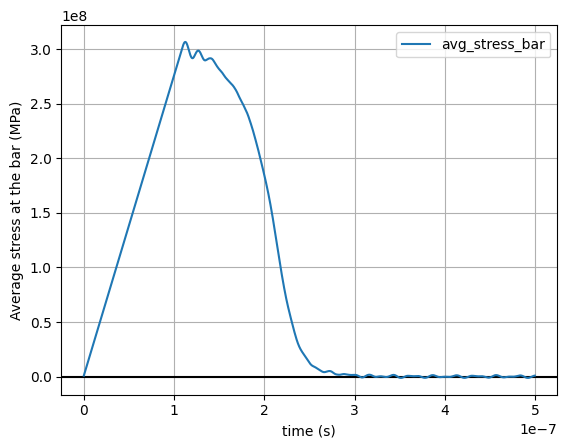

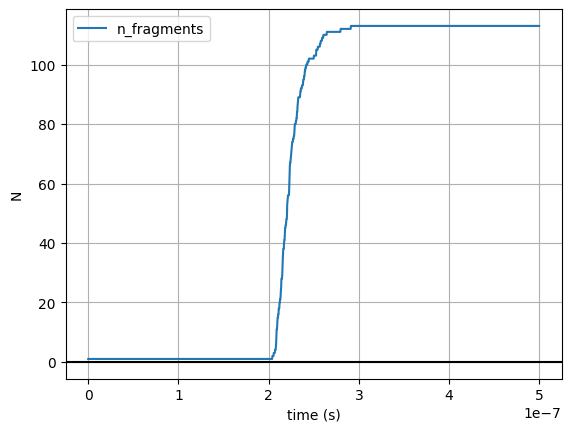

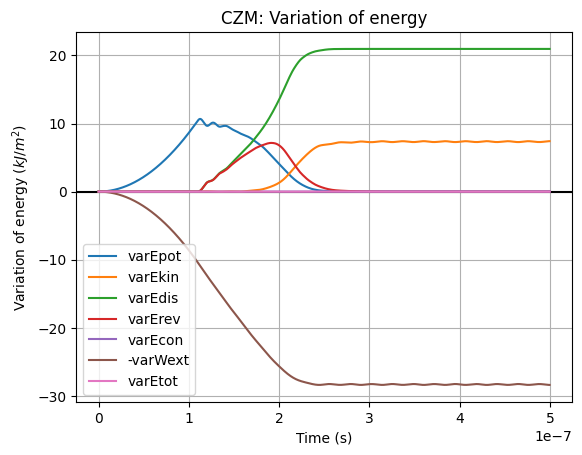

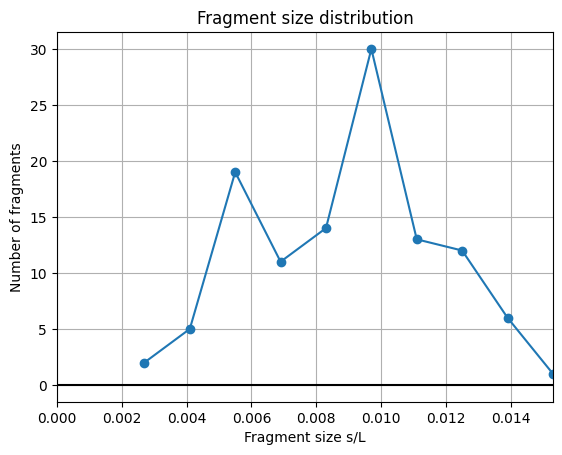

In [5]:
main.analyze_results(model, results, energies, bins=10, **params)